In [8]:
import pandas as pd
from char import char
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv(r"E:\stud.csv")

In [10]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [11]:
np.__version__

'1.26.4'

In [12]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [13]:
x=data[['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch','test_preparation_course','reading_score','writing_score']]

In [14]:
x.shape

(1000, 7)

In [15]:
y=data[['math_score']]

In [16]:
y.shape

(1000, 1)

In [17]:
numerical_features=x.select_dtypes(exclude="object").columns
categorical_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer=StandardScaler()
OH_transformer=OneHotEncoder()

preproccesor=ColumnTransformer(
[
   ("OneHotEncoder",OH_transformer,categorical_features),
    ("StandardScaler",numerical_transformer,numerical_features),
])

In [18]:
x=preproccesor.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
print(x_train.shape)
print(x_test.shape)

(700, 19)
(300, 19)


In [21]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,rmse,r2

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)    # Train Model
    
    #Make predictions
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2483
- Mean Absolute Error: 4.1985
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5576
- Mean Absolute Error: 4.4183
- R2 Score: 0.8759


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 5.2487
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5566
- Mean Absolute Error: 4.4155
- R2 Score: 0.8759


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 6.5106
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8705
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6788
- Mean Absolute Error: 4.5063
- R2 Score: 0.8538
-

In [23]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
1,Ridge Regression,0.875907
0,Linear Regression,0.875863
5,Random Forest Regressor,0.845020
6,AdaBoost Regressor,0.837528
4,XGBoost Regressor,0.811816
2,Lasso Regression,0.810281
3,K-Neighbors Regressor,0.772528
7,Decision Tree Regressor,0.731737


In [24]:
K_model=KNeighborsRegressor()
K_model=K_model.fit(x_train,y_train)
y_pred=K_model.predict(x_test)
score=r2_score(y_test,y_pred)*100

print("Accuracy for the model = {:.2f}".format(score))

Accuracy for the model = 77.25


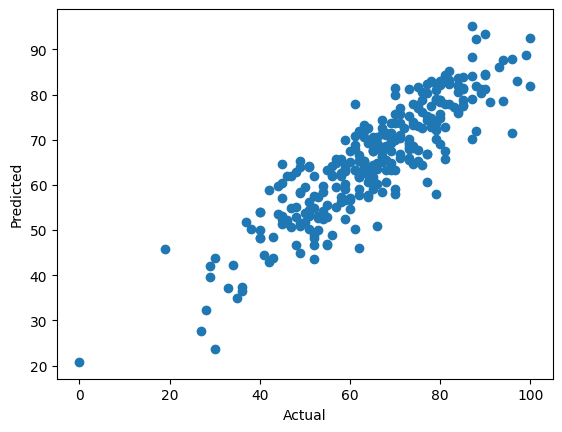

In [95]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

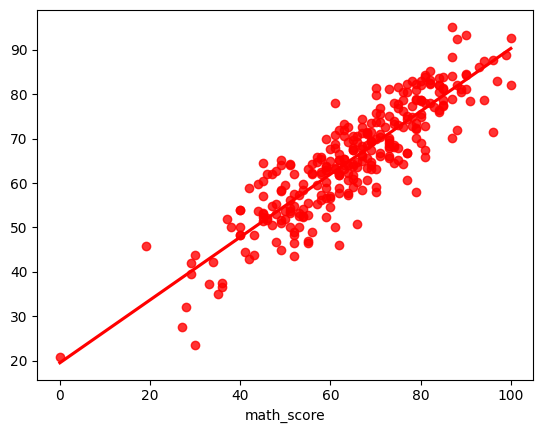

In [96]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
plt.show()

In [26]:

##pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
#pred_df